# Understanding college debt
I want to see what types of universities have students in debt.  We will be using the college scorecard API from data.gov.  I am interested in a number of variables, these are admissions rate, tuition, median household income, student size, etc.

It seems that the UC office of president <a href="http://www.ucop.edu/institutional-research-academic-planning/_files/College%20Scorecard%20Brief.pdf">claims that the UC schools are a good deal</a> based on data from the college scorecard.

You should go begin by getting an <a href="https://api.data.gov/signup/">API key for data.gov</a>.  There are many data.gov APIs that you can use this key for and they have fairly relaxed limits on the number of requests.

The documentation for the API can be found here...<br>
https://github.com/RTICWDT/open-data-maker/blob/master/API.md<br>
https://collegescorecard.ed.gov/data/

Let's import some packages.

In [2]:
from urllib2 import Request, urlopen
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Here are some variable names that we will be interested in.

In [3]:
varnames = """id
school.name
school.degrees_awarded.predominant
2014.admissions.admission_rate.overall
2014.cost.tuition.in_state
2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall
2014.aid.median_debt.noncompleters
2005.student.demographics.median_hh_income
2005.student.demographics.poverty_rate
2014.aid.federal_loan_rate
2014.aid.pell_grant_rate
2014.student.size"""

__Exercise (1)__ I would like to make a complicated query from the API.  An example query from the API is 

<pre>https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=school.name,
2014.aid.pell_grant_rate&_sort=2014.student.size:desc&_page=1
&_per_page=100&api_key=YOURKEY
</pre>

Which can be parsed as  
1. the base url: https://api.data.gov/ed/collegescorecard/v1/schools.json, 
2. a filter of school.degrees_awarded.predominant=3, 
3. return the fields school.name,2014.aid.pell_grant_rate, 
4. sort by 2014.student.size in descending order, 
5. return 1 page of 100 entries, 
6. and use your api key

You can find a more complete description: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

Fill in the following def that fits the following docstring, and gives the shown output.
<pre>
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """


query_url(key,fieldnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2)

https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3,4&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=YOURKEYHERE
</pre>

Try to reproduce the above behavior.

In [4]:
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """
    url= 'https://api.data.gov/ed/collegescorecard/v1/schools.json?{}&_fields={}&_page={}&_per_page=100&_sort={}:desc&api_key={}'.format(filterstring,fieldnames,numpages,sortvar,key)
    return url
##operation on varnames :change it to string, adding missing value
key = 'xStFnySLz87sqbUcPUGH3CSgG0CuEl2rHcZjWpr2'
var = varnames.split('\n')
var.insert(3,'school.degree_urbanization')
fieldnames = var[0]
for i in range(len(var)-1): fieldnames+=','+var[i+1]    
query_url(key,fieldnames,'school.degrees_awarded.predominant=3,4','2014.student.size',2)

'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3,4&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=xStFnySLz87sqbUcPUGH3CSgG0CuEl2rHcZjWpr2'

__Exercise (2)__ Make the query using Request and load the results into a DataFrame that makes sense.

In [9]:
url = query_url(key,fieldnames,'school.degrees_awarded.predominant=3,4','2014.student.size',2)
request = Request(url)
response = urlopen(request)
js = json.loads(response.read())
coll=pd.DataFrame.from_dict(js['results'])
coll=coll.set_index('id')
coll

,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.admissions.admission_rate.overall,2014.aid.federal_loan_rate,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2014.aid.pell_grant_rate,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.student.size,school.degree_urbanization,school.degrees_awarded.predominant,school.name
id,,,,,,,,,,,,,
243346,21682.0,43.689999,NaN,0.3931,6789.5,3275.0,0.8644,5580,5580,12198,None,3,Universidad Del Este
166513,76546.0,6.540000,0.6201,0.5744,25000.0,10422.0,0.2884,12447,27400,12190,None,3,University of Massachusetts-Lowell
190567,48071.0,21.600000,0.3806,0.2225,11551.0,7000.0,0.5180,6389,13199,12175,None,3,CUNY City College
188030,43867.0,17.799999,0.6960,0.4002,18340.0,7624.0,0.4191,5950,19112,12171,None,3,New Mexico State University-Main Campus
166638,68463.0,9.010000,0.7077,0.5523,NaN,NaN,0.3857,11966,28390,12108,None,3,University of Massachusetts-Boston
206604,61970.0,6.550000,NaN,0.5498,25000.0,9500.0,0.3790,8730,16910,12090,None,3,Wright State University-Main Campus
243221,20501.0,45.730000,0.2817,0.0858,5500.0,5500.0,0.5804,2019,4040,12086,None,3,University of Puerto Rico-Rio Piedras
213020,54158.0,7.800000,0.9473,0.7244,27000.0,11000.0,0.3666,9470,20965,12032,None,3,Indiana University of Pennsylvania-Main Campus
181394,66043.0,5.360000,0.7850,0.4500,20000.0,8000.0,0.3260,6750,18070,11989,None,3,University of Nebraska at Omaha


__Exercise (3)__ Produce scatterplots to demonstrate the associations between student debt (for 'completers') and median household income, pell grant rates, student poverty rate, tuition, and federal loan rate.  Do you have an explanation for the associations that you are seeing?  Are there some surprising associations.

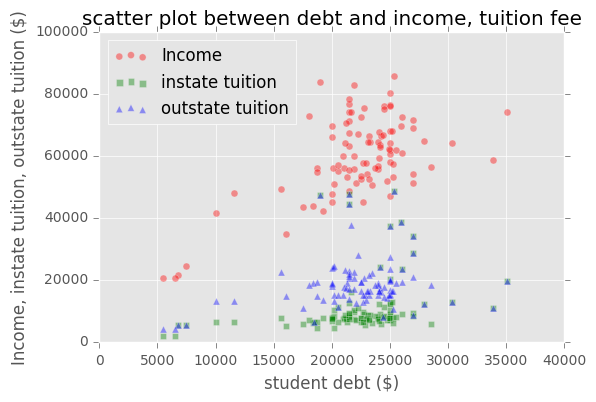

In [11]:
data = pd.DataFrame.from_dict(js['results'])
x = data.iloc[:,4]
y = data.iloc[:,0]
y1 = data.iloc[:,7]
y2 = data.iloc[:,8]
plt.scatter(x,y,s=25,alpha=0.4,marker='o',c='red')
plt.scatter(x,y1,s=25,alpha=0.4,marker='s',c='green')
plt.scatter(x,y2,s=25,alpha=0.4,marker='^')
plt.legend(['Income', 'instate tuition', 'outstate tuition'],loc=2)
plt.xlabel('student debt ($)')
plt.ylabel('Income, instate tuition, outstate tuition ($)')
plt.title('scatter plot between debt and income, tuition fee')
plt.ylim(0,100000)
plt.show()


Firstly, I draw the scatter plot between Median Income and Student debt, which shows that the higher students household income is, the more debt he or she will receive, which did not make sense to me. I think poor student will tend to get lesser debt, and I guess it might be related to education fees. The correlation between education fee and student debt shows that the higher education fee will lead to higher debt which make sense. So I guess the students have lower income might tends to choose instate university and which help them suffer from lower debt, and students who have high income family will choose the best university they are able to attend which cause higher debt. 

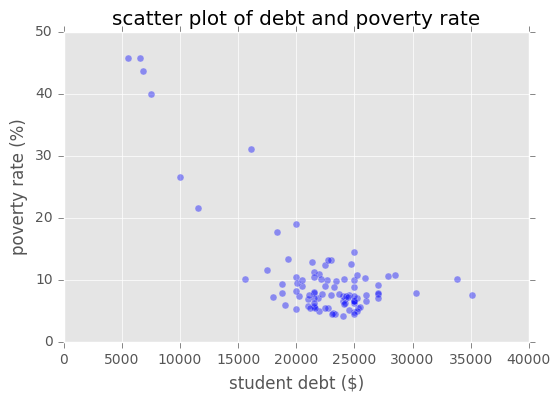

In [12]:
x = data.iloc[:,4]
y = data.iloc[:,1]
plt.scatter(x,y,s=25,alpha=0.4,marker='o')
plt.xlabel('student debt ($)')
plt.ylabel('poverty rate (%)')
plt.title('scatter plot of debt and poverty rate')
plt.show()

This plot makes sense when considering the conclusion I drawed from last plot--poor students tends to choose university located in the state where he or she live in which decrease the debt they have to suffer to pay for tuition fee. Accordingly, the higher the poverty rate, the lower the debt, students who are not poor enough may tend to choose better university which might have higher tuition fee and locate outside the state where he or she live in.

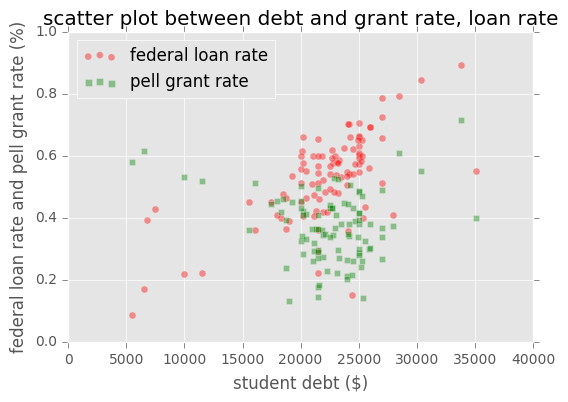

In [13]:
x = data.iloc[:,4]
y = data.iloc[:,3]
y1 = data.iloc[:,6]
plt.scatter(x,y,s=25,alpha=0.4,marker='o',c='red')
plt.scatter(x,y1,s=25,alpha=0.4,marker='s',c='green')
plt.xlabel('student debt ($)')
plt.ylabel('federal loan rate and pell grant rate (%)')
plt.legend(['federal loan rate', 'pell grant rate'],loc=2)
plt.title('scatter plot between debt and grant rate, loan rate')
plt.show()

This plot shows that the debt of student have linear relation with federal loan rate, so this kind of loan might be the major loan student willing to use. On the other hand, the students who have get pell grant might not or get lesser loan from federal, so the higher the debt the lower the pell grant rate.

D:\anaconda\envs\py2\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))
D:\anaconda\envs\py2\lib\site-packages\matplotlib\axes\_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3.0, top=3.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

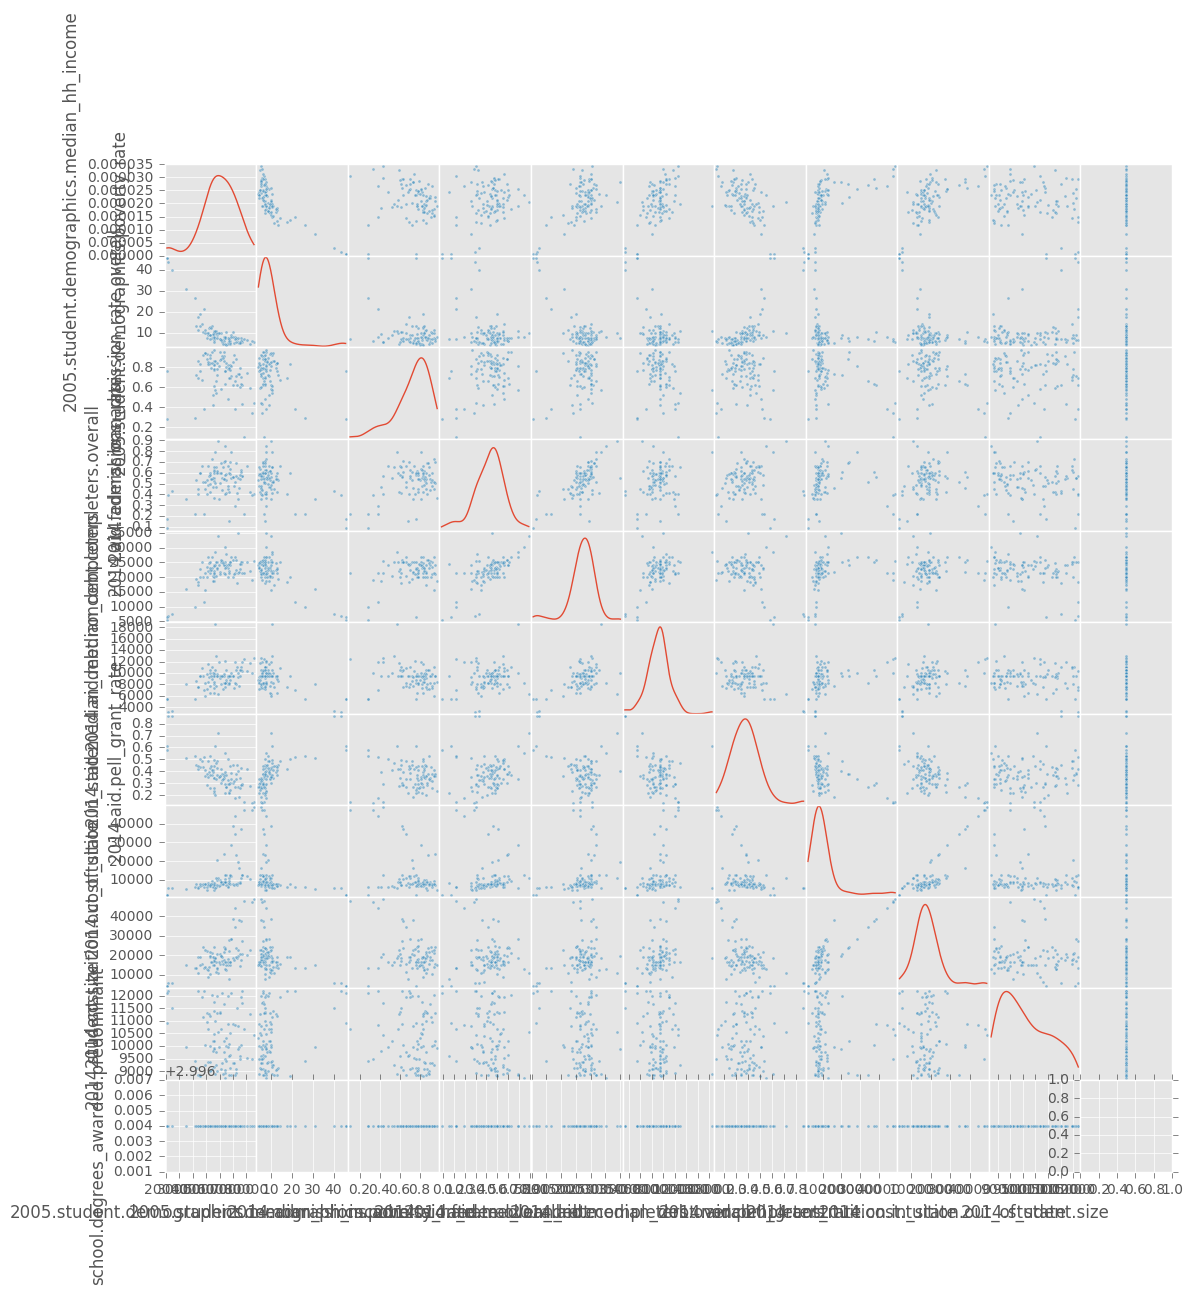

In [16]:
from pandas.tools.plotting import scatter_matrix
_ =scatter_matrix(coll, figsize=(13,13), diagonal='kde')